# Desafío Regresión desde el ambiente de aprendizaje de máquinas

__Integrantes:__ 
- Yerko Carreño
- Javier Pilasi 
- Daniel Flores
- Francisco Fernandez
- Máximo Oliva
- Rocío Ehijo

__Sobre el ejemplo__


* En esta sesión trabajaremos una base de datos sobre los precios de las viviendas en Boston, utilizada en el paper _Harrison Jr, D., & Rubinfeld, D. L. (1978). Hedonic housing prices and the demand for clean air. Journal of environmental economics and management, 5(1), 81-102._

* Nuestro objetivo es desarrollar un modelo predictivo para el valor mediano de las casas mediante el entrenamiento de un modelo de regresión lineal. 


- `crim`: Tasa de criminalidad por sector de Boston
- `zn` proporción de terreno residencial asignado para terrenos baldíos.
- `indus` proporción de negocios no asociados al comercio por sector.
- `chas` Dummy. 1 si el sector colinda con el río Charles, 0 de lo contrario.
- `nox` Concentración de dióxido de carbono
- `rm` cantidad promedio de habitaciones por  casa.
- `age` proporción de casas construídas antes de 1940
- `dis` distancia promedio a cinco centros de empleos.
- `rad` índice de accesibilidad a autopistas.
- `tax` nivel de impuestos asociados a viviendas.
- `ptratio` razón alumno:profesor por sector de Boston.
- `black` proporción de afroamericanos por sector de Boston.
- `lstat` porcentaje de población de estratos bajos.
- `medv` valor mediano de las casas 

## Prepare el ambiente de trabajo
- Importe las librerías básicas para el análisis de datos.
- Importe el módulo linear_model, y las funciones mean_squared_error, r2_score y train_test_split .
- Importe la base de datos boston.csv y elimine la columna Unnamed: 0 .
- Obtenga las medidas descriptivas de la base de datos con .describe() .

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from IPython.display import display, Markdown

In [34]:
df = pd.read_csv("boston.csv")
df = df.drop(columns=["Unnamed: 0"])
df.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
400,25.04610,0.0,18.10,0,0.693,5.987,100.0,1.5888,24,666,20.2,396.90,26.77,5.6
113,0.22212,0.0,10.01,0,0.547,6.092,95.4,2.5480,6,432,17.8,396.90,17.09,18.7
427,37.66190,0.0,18.10,0,0.679,6.202,78.7,1.8629,24,666,20.2,18.82,14.52,10.9
384,20.08490,0.0,18.10,0,0.700,4.368,91.2,1.4395,24,666,20.2,285.83,30.63,8.8
224,0.31533,0.0,6.20,0,0.504,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8


In [35]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## División de la muestra
- Genere conjuntos de entrenamiento y validación con train_test_split.
- Genere segmentaciones del 33% para las muestras de validación.
- Incluya una semilla pseudoaleatoria.

In [22]:
attr_mat = df.drop(['medv'], axis=1)
df_y = df['medv']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    attr_mat, df_y, test_size=0.33, random_state=40)

## Generación de modelos
- Ahora implementaremos dos versiones del modelo lineal:
    - Con intercepto y atributos normalizados.
    - Sin intercepto y atributos no normalizados.
- Cada versión debe generarse en un nuevo objeto inicializado.
- Posteriormente se deben entrenar los modelos especificando la matriz y vector de entrenamiento.
- Con los modelos entrenados, genere una predicción de matriz de validación.

In [24]:
modelo1 = linear_model.LinearRegression(fit_intercept=True, normalize=True)
modelo2 = linear_model.LinearRegression(fit_intercept=False, normalize=False)

In [25]:
modelo1fit = modelo1.fit(X_train, y_train)
modelo2fit = modelo2.fit(X_train, y_train)

In [26]:
medv_yhat1 = modelo1.predict(X_test)
medv_yhat2 = modelo2.predict(X_test)

In [27]:
print('Los valores predecidos para el modelo con intercepto y normalizado: ', medv_yhat1)

Los valores predecidos para el modelo con intercepto y normalizado:  [21.91450954 32.43549858  9.41646948 16.44926671 17.96100207 31.93144495
 25.09215936 15.47686185 21.67313156 -3.64985488 26.07082519 15.5122347
  5.68133032  5.62389129 25.42134106 34.81828865 26.1507173  19.24742174
 24.07448394 15.03485843 39.60313848 11.11112845 36.6650798  26.01782937
 38.77598013 25.27320829 21.81538567 18.95581327 18.26953576 18.6491498
 24.63128393 23.72068316 29.64341433 24.10097936  0.54375147 24.67344736
 25.25001855 12.27136329 39.51185564 32.24393006 23.81151075  7.11911935
 20.38283491 20.99262225 31.41727817  7.52633186 12.63479522 31.34904545
 22.48091294 35.81078968 12.79991345 20.74592282 18.40153178  7.72726307
  6.50920911 40.56012373 25.00715621 24.16673562 23.11327735  7.4281137
 22.89453201  9.79280527 32.99809817 13.99805159 28.52328236 17.14428124
  3.56278513 28.64408688 19.43041774 18.90432621 19.29523158 27.90357514
 21.22951105 27.97950885 34.29747536 20.06671016 13.468911

In [28]:
print('Los valores predecidos para el modelo sin intercepto y no normalizado: ',medv_yhat2)

Los valores predecidos para el modelo sin intercepto y no normalizado:  [23.70802767 31.40789193  9.26381491 16.93465486 17.1678887  31.18073266
 25.64394652 17.66764656 23.21669805 -4.15776469 24.92771071 16.41907986
  5.24940156  5.05188156 22.89350753 34.51382143 23.01851593 20.74269387
 27.1154735  17.45023058 40.65638965 12.09496793 36.62293906 25.47515501
 41.52639279 27.81227624 20.97757227 21.03999322 20.74641428 18.19237969
 24.78358593 22.54477539 28.55873271 23.64148552 -0.91829422 24.35062385
 24.56189349 12.46433058 41.26190437 31.93933876 24.45028484  9.06568009
 19.0402384  21.22354036 30.00980832  8.33440901 13.21618544 29.88165076
 17.43428185 35.65182793 15.70405161 19.75638375 15.25527105 10.85167625
  8.14402206 42.84903475 22.77284385 23.39209855 21.99206032  8.088339
 22.1139753  10.90508656 32.05222987 13.65815286 26.4207424  17.04313839
  5.02686456 29.79698179 21.79041687 18.8571034  19.8335255  27.30926054
 19.21403998 29.69789444 33.60785553 19.85179733 14.67

## Obtención de métricas
- Ahora generemos una función llamada report_scores que ingrese como argumentos el vector de datos predichos y el vector de datos por validar.
- La función debe imprimir las métricas del Error Cuadrático Promedio y R2.
- Reporte las métricas para ambos modelos. En base a ello, seleccione el mejor modelo. __Resp: El primer modelo, con atributos normalizados e intersección, se ajusta mejor, con un menor error cuadrático medio, además el R-cuadrado explica en mayor porcentaje el vector objetivo.__

In [40]:
def report_scores(vector_pred, vector_valid):
    mse = mean_squared_error(vector_valid, vector_pred).round(2)
    r2 = r2_score(vector_valid, vector_pred).round(2)
    print('Error cuadrático medio: ', mse)
    print('R-cuadrado: ', r2)

    return (mse, r2)


m1_mse, m1_r2 = report_scores(y_test, medv_yhat1)
m2_mse, m2_r2 = report_scores(y_test, medv_yhat2)

Error cuadrático medio:  29.26
R-cuadrado:  0.6
Error cuadrático medio:  32.14
R-cuadrado:  0.56


## Refactorización del modelo
- Genere una función llamada fetch_features que ingrese como argumentos la base de datos y el nombre del vector objetivo. El nombre del vector debe ser `medv` por defecto.
- La función debe retornar una lista con las correlaciones entre cada atributo y el vector objetivo y su nombre.
- Reporte brevemente cuales los 6 atributos con una mayor correlación con medv. __Resp: Los atributos con mayor correlación son lstat, rm, ptratio, indus, tax y nox.__


In [30]:
def fetch_features(df, vector_obj='medv'):
    columns = df.columns
    attr_name = []
    pearson_r = []
    abs_pearson_r = []

    for col in columns:
        if col != vector_obj:
            attr_name.append(col)
            pearson_r.append(df[col].corr(df[vector_obj]))
            abs_pearson_r.append(abs(df[col].corr(df[vector_obj])))

    features = pd.DataFrame({
        'attribute': attr_name,
        'corr': pearson_r,
        'abs_corr': abs_pearson_r
    })
    features = features.set_index('attribute')
    features = features.sort_values(by=['abs_corr'], ascending=False)

    return features

In [31]:
fetch_features(df)

,corr,abs_corr
attribute,,
lstat,-0.737663,0.737663
rm,0.695360,0.695360
ptratio,-0.507787,0.507787
indus,-0.483725,0.483725
tax,-0.468536,0.468536
nox,-0.427321,0.427321
crim,-0.388305,0.388305
rad,-0.381626,0.381626
age,-0.376955,0.376955


## Refactorización del modelo predictivo
- Genere otros conjuntos de entrenamiento y validación en base a una matriz con los 6 atributos identificados y el vector objetivo.
- Entrene un modelo en base al mejor desempeño.
- Reporte las métricas para el nuevo modelo.

__Métricas modelo refactorizado con intercepto y atributos normalizados__

Error cuadrático medio:  25.04
R-cuadrado:  0.53


__Métricas modelo refactorizado sin intercepto y atributos no normalizados__

Error cuadrático medio:  25.98
R-cuadrado:  0.52


__Comparasión de métricas__

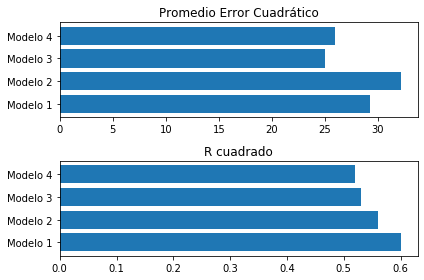

In [71]:
# Genera un nuevo modelo con los 6 atributos con mayor correlación

attr_mat2 = df.loc[:, ['lstat', 'ptratio', 'rm', 'indus', 'tax', 'nox']]

# Obtiene vectores de entrenamiento y test

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    attr_mat2, df_y, test_size=0.33, random_state=666)

# Define modelo 

modelo3 = linear_model.LinearRegression(fit_intercept=True, normalize=True)
modelo4 = linear_model.LinearRegression(fit_intercept=False, normalize=False)


modelo3fit = modelo3.fit(X_train2, y_train2)
modelo4fit = modelo4.fit(X_train2, y_train2)

# Predice utilizando modelo

medv_yhat3 = modelo3.predict(X_test2)
medv_yhat4 = modelo4.predict(X_test2)

# Obtiene métricas

display(Markdown("__Métricas modelo refactorizado con intercepto y atributos normalizados__"))
m3_mse, m3_r2 = report_scores(y_test2, medv_yhat3)

display(Markdown("__Métricas modelo refactorizado sin intercepto y atributos no normalizados__"))
m4_mse, m4_r2 = report_scores(y_test2, medv_yhat4)

display(Markdown("__Comparasión de métricas__"))

plt.subplot(2,1,1)
plt.barh(['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4'], [m1_mse, m2_mse, m3_mse, m4_mse])
plt.title("Promedio Error Cuadrático")
plt.subplot(2,1, 2)
plt.barh(['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4'], [m1_r2, m2_r2, m3_r2, m4_r2])
plt.title("R cuadrado");
plt.tight_layout()


Se puede ver que los nuevos modelos refactorizados tienen mejor error cuadrático que los modelos que utilizan todos los atributos. El modelo 3, con intercepto y atributos normalizados, es el mejor modelo, con menor error cuadrático entre todos los modelos generados. 

## Predicción de casos

A continuación se generaron dos arrays que representan el peor escenario posible (`worst_neighbor`) y el mejor escenario posible (`best_neighbor`).

```
worst_neighbor = np.array([37.9, 12.6, 3.5, 27.7, 187, 0.87]).reshape(1, -1)
best_neighbor = np.array([1.73, 22, 8.7, 0.46, 711, 0.38]).reshape(1, -1)
```

Los valores númericos representan los siguientes atributos ['lstat', 'ptratio', 'rm', 'indus', 'tax', 'nox'].

Ingrese los arrays en el modelo entrenado y reporte cuál sería el valor esperado dada las condiciones.

In [80]:
worst_neighbor = np.array([37.9, 12.6, 3.5, 27.7, 187, 0.87]).reshape(1, -1)
best_neighbor = np.array([1.73, 22, 8.7, 0.46, 711, 0.38]).reshape(1, -1)

medv_worst3 = round(modelo3.predict(worst_neighbor)[0], 3)
medv_best3 = round(modelo3.predict(best_neighbor)[0], 3)

display(Markdown("__Valores esperados utilizando los modelos refactorizados__"))
display(Markdown("Peor vecindario {} y mejor vecindario {}".format(medv_worst3, medv_best3)))


__Valores esperados utilizando los modelos refactorizados__

Peor vecindario 2.799 y mejor vecindario 35.176